   # EDA Pfizer Vaccine Tweets
____

### Data manipulation libraries:

In [1]:
import pandas as pd
import numpy  as np

### Visualization libraries:

In [2]:
import matplotlib.pyplot as plt
import seaborn           as sns
import warnings
warnings.filterwarnings('ignore')

### collections libraries: 

In [3]:
from collections import Counter

### Load Dataset

In [4]:
df =pd.read_csv("vaccination_tweets.csv") #I read the data in the Jupyter Notebook

### Data Overview

In [5]:
df.head(10) #View the first 10 columns

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False


In [6]:
df.tail(10) #View the last 10 columns

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
10837,1448465164748001282,Yaffa Lyulka,USA,"Citizen of the world. ❤️ #Love #travel, #tea &...",2010-11-27 20:45:15,7093,7777,310114,False,2021-10-14 01:46:21,I'm vaccinated. I still wear a mask.\nI wear i...,"['Iamyou', 'Youareme']",Twitter for iPhone,2,4,False
10838,1448409639037644803,Jacob Newton,NaN,Journalist with KELOLAND News | Husband | Dad ...,2019-12-25 16:23:26,95,100,330,False,2021-10-13 22:05:42,While the Pfizer-BioNTech vaccine has been aut...,NaN,Twitter Web App,0,0,False
10839,1448385874203398147,Skull Of Syria,NaN,Save Syria. Free Palestine. 2 State solution. ...,2016-10-05 21:12:43,369,972,1131,False,2021-10-13 20:31:16,The #chemtrails finally make sense - alongside...,"['chemtrails', 'climatecatastrophe']",Twitter for Android,0,0,False
10840,1448379238785032194,one.small.wish,Ohio,"Old enough to know better, young enough to do ...",2009-10-21 18:27:09,801,2118,65303,False,2021-10-13 20:04:54,8. Pfizer's vaccine has been FDA-approved. Hm....,NaN,Twitter Web App,0,1,False
10841,1448376675801055234,one.small.wish,Ohio,"Old enough to know better, young enough to do ...",2009-10-21 18:27:09,801,2118,65303,False,2021-10-13 19:54:43,Oh and hey: Update yourself: https://t.co/GGle...,['PfizerBioNTech'],Twitter Web App,0,1,False
10842,1448358770971643916,Pistache,NaN,NaN,2020-04-13 01:44:16,58,98,3522,False,2021-10-13 18:43:34,2019🎞️https://t.co/mbNxvTvcHn Transplant touri...,"['COP15', 'COP26', 'COVID19']",Twitter for Android,0,0,False
10843,1448357099193479169,"Sarah Tallent, DNP, CPNP-AC","North Carolina, USA",AC-PNP and instructor | family-centered care a...,2020-04-29 20:28:02,188,472,569,False,2021-10-13 18:36:56,Got that power boost 💉🦠 \n\nI do it for myself...,['PfizerBiontech'],Twitter for iPhone,1,3,False
10844,1448310047759642631,Antoine Haddad,NaN,Expat since 2015,2021-07-14 09:00:03,652,310,5345,False,2021-10-13 15:29:58,Today I took my second shot of #PfizerBiontech...,"['PfizerBiontech', 'UAE', 'Dubai']",Twitter for iPhone,1,33,False
10845,1448208383094312962,ActivistBowen (PFIZERED TO THE MAX!/GET VAXXED!),Hong Kong,"AMERICAN in HONG KONG, person, blogger, dissid...",2011-06-08 20:17:01,3998,5002,5052,False,2021-10-13 08:45:59,"@RCDG_PhD 1. from YOUR FELLOW HUMAN...,(Octobe...","['FULLYVACCINATED', 'PFIZERBIONTECH', 'PFIZER']",Twitter Web App,0,0,False
10846,1448202162912129032,Baey Yam Keng 马炎庆,Singapore,"MP for Tampines GRC, Senior Parliamentary Secr...",2009-02-12 06:52:13,43500,266,893,True,2021-10-13 08:21:16,Just took my booster jab. Not sure if I would ...,['covid_19'],Twitter for iPhone,0,20,False


In [7]:
df.info() # Displays comprehensive information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10847 entries, 0 to 10846
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10847 non-null  int64 
 1   user_name         10847 non-null  object
 2   user_location     8624 non-null   object
 3   user_description  10177 non-null  object
 4   user_created      10847 non-null  object
 5   user_followers    10847 non-null  int64 
 6   user_friends      10847 non-null  int64 
 7   user_favourites   10847 non-null  int64 
 8   user_verified     10847 non-null  bool  
 9   date              10847 non-null  object
 10  text              10847 non-null  object
 11  hashtags          8315 non-null   object
 12  source            10846 non-null  object
 13  retweets          10847 non-null  int64 
 14  favorites         10847 non-null  int64 
 15  is_retweet        10847 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [8]:
# Shows the number of rows and columns in the data
print('Data has {} rows and {} columns'.format(df.shape[0], df.shape[1])) 

Data has 10847 rows and 16 columns


# Data cleaning

### Convert date column from object to datetime

In [9]:
df['date'] =  pd.to_datetime(df['date']) #convert to datetime

In [10]:
#show the new data type , date = datetime
df.dtypes

id                           int64
user_name                   object
user_location               object
user_description            object
user_created                object
user_followers               int64
user_friends                 int64
user_favourites              int64
user_verified                 bool
date                datetime64[ns]
text                        object
hashtags                    object
source                      object
retweets                     int64
favorites                    int64
is_retweet                    bool
dtype: object

### Drop Columns [ id , user_description , is_retweet  ]

In [11]:
df.drop('id', axis=1, inplace=True)
df.drop('user_description', axis=1, inplace=True)
df.drop('is_retweet', axis=1, inplace=True)

In [12]:
# Column names are displayed after deletion
df.columns 

Index(['user_name', 'user_location', 'user_created', 'user_followers',
       'user_friends', 'user_favourites', 'user_verified', 'date', 'text',
       'hashtags', 'source', 'retweets', 'favorites'],
      dtype='object')

### Find Duplicates

In [13]:
duplicate = df[df.duplicated()] #Now duplicate items
duplicate

,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites


- Now duplicate items

### Check for null values

In [14]:
df.isnull().values.any() # Shoe me i have null values

True

In [15]:
df.isnull().sum().sum() # Sum total of the null values 

4756

In [16]:
df.isnull().sum() # Columns with nall values 

user_name             0
user_location      2223
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags           2532
source                1
retweets              0
favorites             0
dtype: int64

### Substitution for null values

In [17]:
df["user_location"].fillna('Others' , inplace = True) # Replace the nall values with others
df["hashtags"].fillna('##' , inplace = True) # Replace the nall values with ##

In [18]:
df.isna().sum()

user_name          0
user_location      0
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
hashtags           0
source             1
retweets           0
favorites          0
dtype: int64

In [19]:
df["user_location"].isnull() # To check the there are no missing values

0        False
1        False
2        False
3        False
4        False
         ...  
10842    False
10843    False
10844    False
10845    False
10846    False
Name: user_location, Length: 10847, dtype: bool

In [20]:
df["hashtags"].isnull() # To check the there are no missing values

0        False
1        False
2        False
3        False
4        False
         ...  
10842    False
10843    False
10844    False
10845    False
10846    False
Name: hashtags, Length: 10847, dtype: bool

### Drop row [source]

In [21]:
df.dropna(inplace=True)

In [22]:
df.isna().sum()

user_name          0
user_location      0
user_created       0
user_followers     0
user_friends       0
user_favourites    0
user_verified      0
date               0
text               0
hashtags           0
source             0
retweets           0
favorites          0
dtype: int64

In [23]:
df.sample(10) #View the samle 10 columns

,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites
6509,xBullieMad13x,"North East, England",2011-06-27 12:57:17,28,210,403,False,2021-03-04 16:27:12,"All done, pleased I got the #AstraZeneca #vacc...","['AstraZeneca', 'vaccine', 'PfizerBioNTech']",Twitter for Android,0,0
5507,Jeremy Fine,Chicago/Chapel Hill,2020-12-24 00:28:01,34,229,50,False,2021-02-11 16:34:27,#PfizerBiontech Shot #2 update: I'm a little u...,['PfizerBiontech'],Twitter for Android,0,2
4667,Scott Mackay 🇨🇦 🏃‍♂️ ☕️ 🍷 8⃣0⃣ 🎵,Canada,2012-01-12 19:31:36,721,717,13283,False,2021-01-26 10:54:17,#EU threat will not impact #Covid19vaccine del...,"['EU', 'Covid19vaccine', 'UK', 'Pfizer']",Twitter Web App,0,0
5038,Brian McDonough,"Philadelphia, Pa.",2011-08-06 16:18:19,667,64,1914,False,2021-02-02 12:00:09,What we know about Mutations https://t.co/UVGB...,"['mutations', 'vaccine', 'vaccinationCovid', '...",Twitter Web App,0,0
5551,Baaghi TV باغی ٹی وی,Pakistan,2012-12-17 13:56:38,43186,5,1422,True,2021-02-13 19:20:40,Lebanon receives first COVID vaccines\nhttps:/...,"['Lebanon', 'COVID19', 'coronavirus', 'Covid_1...",Twitter Web App,0,0
588,Adityavikram,"Pune, Maharashtra",2011-08-17 04:28:18,23,184,114,False,2020-12-16 15:28:53,What if all the governments was a #AmazonPrime...,"['AmazonPrime', 'PfizerBioNTech', 'Amazon']",Twitter for Android,0,0
6535,Shrupti,DC,2009-07-28 12:08:24,1162,1529,7153,False,2021-03-11 20:54:33,Got my #dcvaccine thank you to Larry. I didn’t...,"['dcvaccine', 'PfizerBioNTech']",Twitter for iPhone,0,10
6469,B.W.C.,Others,2013-10-18 08:29:41,204,1091,4009,False,2021-03-03 18:21:06,Second and final dose: March 24th!\n\n#COVIDVa...,"['COVIDVaccine', 'COVIDVaccination', 'PfizerBi...",Twitter for Android,0,0
3106,May,Others,2014-03-22 07:54:44,275,1523,807,False,2021-01-10 15:50:56,English-Lit: The Possible Side Effects of Pfiz...,['vaccine'],Twitter for Android,0,0
9920,EPM Magazine,Cheshire,2009-02-18 16:48:34,4050,1550,952,False,2021-08-24 09:50:09,UK orders additional 35m doses of Pfizer/BioNT...,"['COVID19', 'PfizerBiontech']",Twitter Web App,4,3


In [24]:
# Counts the Number of tweets per person
name = Counter(df['user_name'])
name = pd.Series(name).sort_values(ascending=False)
name = name[name>4]

In [25]:
# Calculates the locations of people who are interested in the vaccine 
locations = pd.Series(Counter(df['user_location'])).sort_values(ascending=False)
locations = locations.drop('Others')[locations>5]

In [26]:
#Calcuates the type of devices from which the tweet was made
source = Counter(df['source'])
source = pd.Series(source).sort_values(ascending=False)

In [27]:
#Counts the number of verified and unverified accounts  
verified = Counter(df['user_verified'])
verified = pd.Series(verified).sort_values(ascending=False)

__________

# Charts

### Q1 \ What is the relationship of the columns to each other?

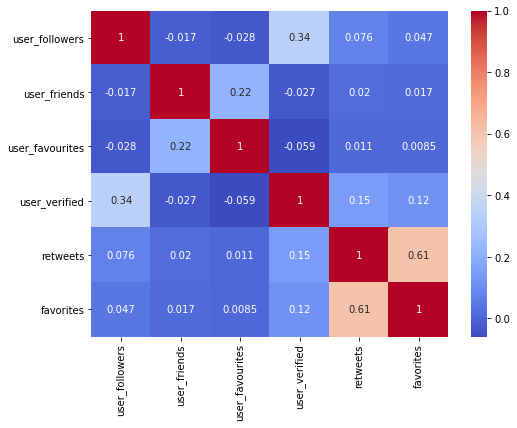

In [28]:
# Find Coreelation
# the more retweets the more favourite
# most of the people is not interested in vaccine 
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap ="coolwarm",annot = True)
plt.show()

### Is the Publisher account verified or not?

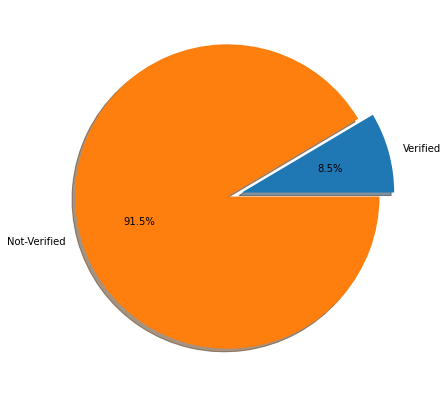

In [29]:
# Most of published accounts are not verified

dict_ = df['user_verified'].value_counts().to_dict()
dict_['Verified'] = dict_.pop(True)
dict_['Not-Verified'] = dict_.pop(False)

plt.figure(figsize=(7,7))
plt.pie(x=dict_.values(), labels=dict_.keys(), autopct='%1.1f%%', shadow=True, startangle=0, explode = [0.1, 0])
plt.show()

### Q3 \ What are the sources of the tweet?

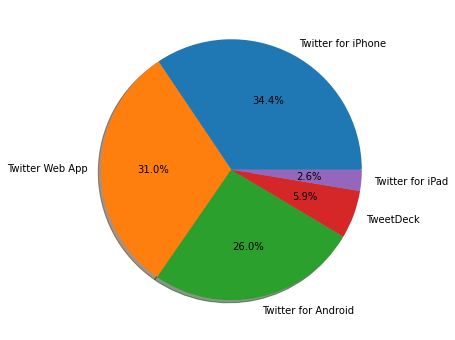

In [30]:
# Top 5 Sources (Platform) of tweets
# most of people tweets from iphone devices
source_count = Counter(df['source'].tolist()).most_common(5)
temp = pd.DataFrame(source_count, columns=['Source', 'Count'])

plt.figure(figsize=(7,6))
plt.pie(x=temp['Count'], labels=temp['Source'], autopct='%1.1f%%', shadow=True, startangle=0)
plt.show()



### Q4 \ In which time this country showed an interest in vaccines?

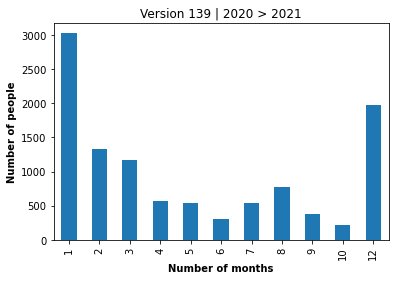

In [31]:
# 21-12-2020 > 21-10-2021
df1 = df["date"].dt.month.value_counts().sort_index().plot(kind ="bar")
plt.xlabel('Number of months', weight='bold')
plt.ylabel('Number of people', weight='bold')
plt.title('Version 139 | 2020 > 2021')
plt.show()


### َQ5 \What are the most important countries in which awareness of taking the vaccine is widespread?

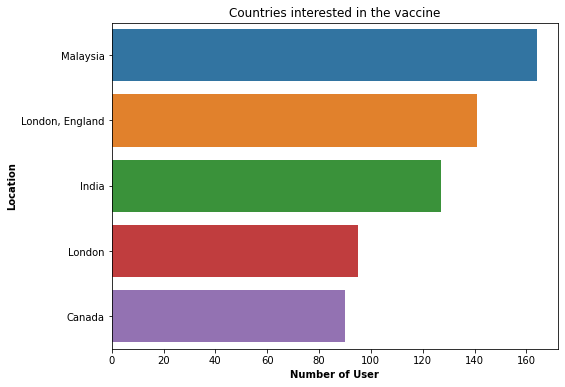

In [32]:
# locations with most number of users tweets
df1 = df['user_location'].copy()
df1 = df1[df1!='Others']

plt.figure(figsize=(8,6))
sns.countplot(y=df1, data=df1, order=df1.value_counts().index[:5])
plt.title('Countries interested in the vaccine')
plt.xlabel('Number of User', weight='bold')
plt.ylabel('Location', weight='bold')
plt.show()
